# NYPD Shooting Incident Data Report

***

## Project Description

Import, tidy and analyze the NYPD Shooting Incident dataset obtained. Be sure your project is reproducible and contains some visualization and analysis. You may use the data to do any analysis that is of interest to you. You should include at least two visualizations and one model. Be sure to identify any bias possible in the data and in your analysis.

## Data Dictionary

<img src='nypd.jpg'>

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("NYPD_Shooting_Incident_Data__Historic.csv",parse_dates=['OCCUR_DATE'])

In [3]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,2006-08-27,05:35:00,BRONX,52,0.00,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1017541.56,255918.88,40.87,-73.88,POINT (-73.87963173099996 40.86905819000003)
1,77673979,2011-03-11,12:03:00,QUEENS,106,0.00,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1027543.00,186095.00,40.68,-73.84,POINT (-73.84392019199998 40.677366895000034)
2,203350417,2019-10-06,01:09:00,BROOKLYN,77,0.00,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,995325.00,185155.00,40.67,-73.96,POINT (-73.96007501899999 40.674885741000026)
3,80584527,2011-09-04,03:35:00,BRONX,40,0.00,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1007453.00,233952.00,40.81,-73.92,POINT (-73.91618413199996 40.80879780500004)
4,90843766,2013-05-27,21:16:00,QUEENS,100,0.00,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1041267.38,157133.52,40.60,-73.79,POINT (-73.79468553799995 40.597796249000055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23580,186329304,2018-08-12,19:50:00,BROOKLYN,84,0.00,NaN,False,25-44,M,BLACK,65+,M,BLACK,989154.69,193164.27,40.70,-73.98,POINT (-73.98231375199998 40.69687491500008)
23581,29277330,2007-05-26,04:57:00,BROOKLYN,81,0.00,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1005218.00,190528.00,40.69,-73.92,POINT (-73.92439311199996 40.689615497000034)
23582,77443443,2011-02-25,01:12:00,BROOKLYN,81,0.00,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,<18,M,BLACK,1003998.75,187611.03,40.68,-73.93,POINT (-73.92879814299994 40.681611891000045)
23583,176027888,2018-03-17,00:46:00,BRONX,43,0.00,NaN,False,25-44,M,UNKNOWN,25-44,M,WHITE HISPANIC,1018728.50,242744.23,40.83,-73.88,POINT (-73.87540796899998 40.83289318000004)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23585 entries, 0 to 23584
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             23585 non-null  int64         
 1   OCCUR_DATE               23585 non-null  datetime64[ns]
 2   OCCUR_TIME               23585 non-null  object        
 3   BORO                     23585 non-null  object        
 4   PRECINCT                 23585 non-null  int64         
 5   JURISDICTION_CODE        23583 non-null  float64       
 6   LOCATION_DESC            10004 non-null  object        
 7   STATISTICAL_MURDER_FLAG  23585 non-null  bool          
 8   PERP_AGE_GROUP           15290 non-null  object        
 9   PERP_SEX                 15324 non-null  object        
 10  PERP_RACE                15324 non-null  object        
 11  VIC_AGE_GROUP            23585 non-null  object        
 12  VIC_SEX                  23585 n

In [5]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,23585.00,23585.00,23583.00,23585.00,23585.00,23585.00,23585.00
mean,102280741.24,66.21,0.33,1009379.25,207299.73,40.74,-73.91
std,60806408.48,27.11,0.74,18540.15,31799.86,0.09,0.07
min,9953245.00,1.00,0.00,914928.06,125756.72,40.51,-74.25
25%,55322804.00,44.00,0.00,999925.31,182539.36,40.67,-73.94
50%,83435362.00,69.00,0.00,1007654.00,193470.23,40.70,-73.92
75%,150911774.00,81.00,0.00,1016782.06,239162.92,40.82,-73.88
max,230611229.00,123.00,2.00,1066815.38,271127.69,40.91,-73.70


In [6]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'], dtype='object')

### Drop unwanted features

In [7]:
df.drop(['INCIDENT_KEY','LOCATION_DESC','X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],axis=1,inplace=True)

### Treat Missing Values

In [8]:
df.isnull().sum()

OCCUR_DATE                    0
OCCUR_TIME                    0
BORO                          0
PRECINCT                      0
JURISDICTION_CODE             2
STATISTICAL_MURDER_FLAG       0
PERP_AGE_GROUP             8295
PERP_SEX                   8261
PERP_RACE                  8261
VIC_AGE_GROUP                 0
VIC_SEX                       0
VIC_RACE                      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
dtype: int64

In [11]:
df.reset_index(inplace=True, drop=True)

In [12]:
df

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,2007-05-31,21:50:00,BRONX,47,0.00,True,18-24,M,BLACK,25-44,M,BLACK
1,2006-06-01,11:40:00,BROOKLYN,75,2.00,False,UNKNOWN,M,BLACK,18-24,M,BLACK
2,2006-06-13,20:56:00,BROOKLYN,70,0.00,True,25-44,M,BLACK,25-44,M,BLACK
3,2015-07-23,00:22:00,BROOKLYN,90,2.00,False,25-44,M,WHITE HISPANIC,25-44,M,BLACK
4,2009-12-17,13:45:00,MANHATTAN,20,0.00,True,25-44,M,WHITE HISPANIC,45-64,F,WHITE HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...
15283,2009-06-25,23:20:00,QUEENS,110,0.00,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK
15284,2018-08-12,19:50:00,BROOKLYN,84,0.00,False,25-44,M,BLACK,65+,M,BLACK
15285,2011-02-25,01:12:00,BROOKLYN,81,0.00,False,18-24,M,BLACK,<18,M,BLACK
15286,2018-03-17,00:46:00,BRONX,43,0.00,False,25-44,M,UNKNOWN,25-44,M,WHITE HISPANIC


### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [14]:
df.describe(include='all')

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
count,15288,15288,15288,15288.00,15288.00,15288,15288,15288,15288,15288,15288,15288
unique,4368,1354,5,NaN,NaN,2,9,3,7,6,3,7
top,2006-09-04 00:00:00,00:30:00,BROOKLYN,NaN,NaN,False,18-24,M,BLACK,25-44,M,BLACK
freq,25,91,5832,NaN,NaN,12340,5508,13488,10024,6493,13683,10476
first,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,65.91,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,28.12,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,44.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Type Change

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OCCUR_DATE               15288 non-null  datetime64[ns]
 1   OCCUR_TIME               15288 non-null  object        
 2   BORO                     15288 non-null  object        
 3   PRECINCT                 15288 non-null  int64         
 4   JURISDICTION_CODE        15288 non-null  float64       
 5   STATISTICAL_MURDER_FLAG  15288 non-null  bool          
 6   PERP_AGE_GROUP           15288 non-null  object        
 7   PERP_SEX                 15288 non-null  object        
 8   PERP_RACE                15288 non-null  object        
 9   VIC_AGE_GROUP            15288 non-null  object        
 10  VIC_SEX                  15288 non-null  object        
 11  VIC_RACE                 15288 non-null  object        
dtypes: bool(1), datetime64[ns](1), f

In [16]:
df["JURISDICTION_CODE"] = df["JURISDICTION_CODE"].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OCCUR_DATE               15288 non-null  datetime64[ns]
 1   OCCUR_TIME               15288 non-null  object        
 2   BORO                     15288 non-null  object        
 3   PRECINCT                 15288 non-null  int64         
 4   JURISDICTION_CODE        15288 non-null  object        
 5   STATISTICAL_MURDER_FLAG  15288 non-null  bool          
 6   PERP_AGE_GROUP           15288 non-null  object        
 7   PERP_SEX                 15288 non-null  object        
 8   PERP_RACE                15288 non-null  object        
 9   VIC_AGE_GROUP            15288 non-null  object        
 10  VIC_SEX                  15288 non-null  object        
 11  VIC_RACE                 15288 non-null  object        
dtypes: bool(1), datetime64[ns](1), i

## Data Visualization

### Univariate Data Exploration

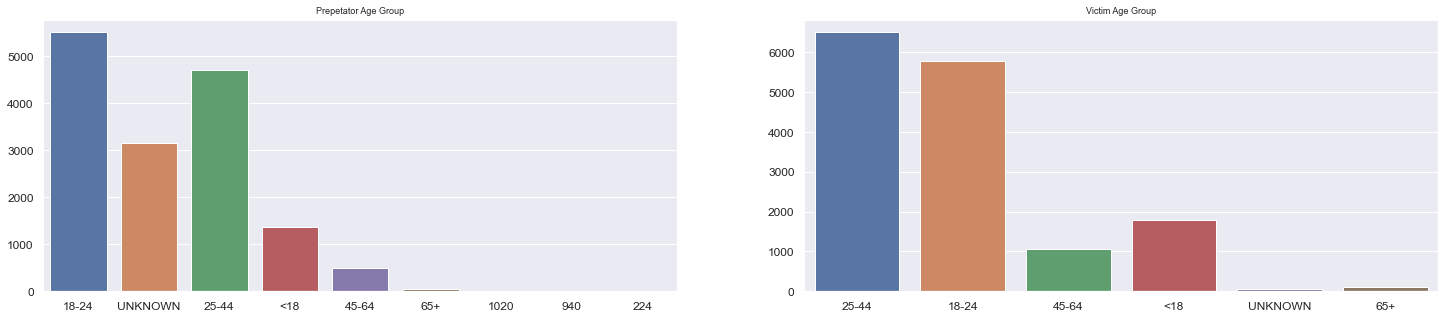

In [18]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(25,5))
#fig.suptitle('Main Title')

sns.countplot(x="PERP_AGE_GROUP", data=df, ax=ax[0])
ax[0].set_title('Prepetator Age Group')
ax[0].tick_params('x', labelrotation=0)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="VIC_AGE_GROUP", data=df,ax=ax[1])
ax[1].set_title('Victim Age Group')
ax[1].tick_params('x', labelrotation=0)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

In [19]:
df.columns

Index(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'], dtype='object')

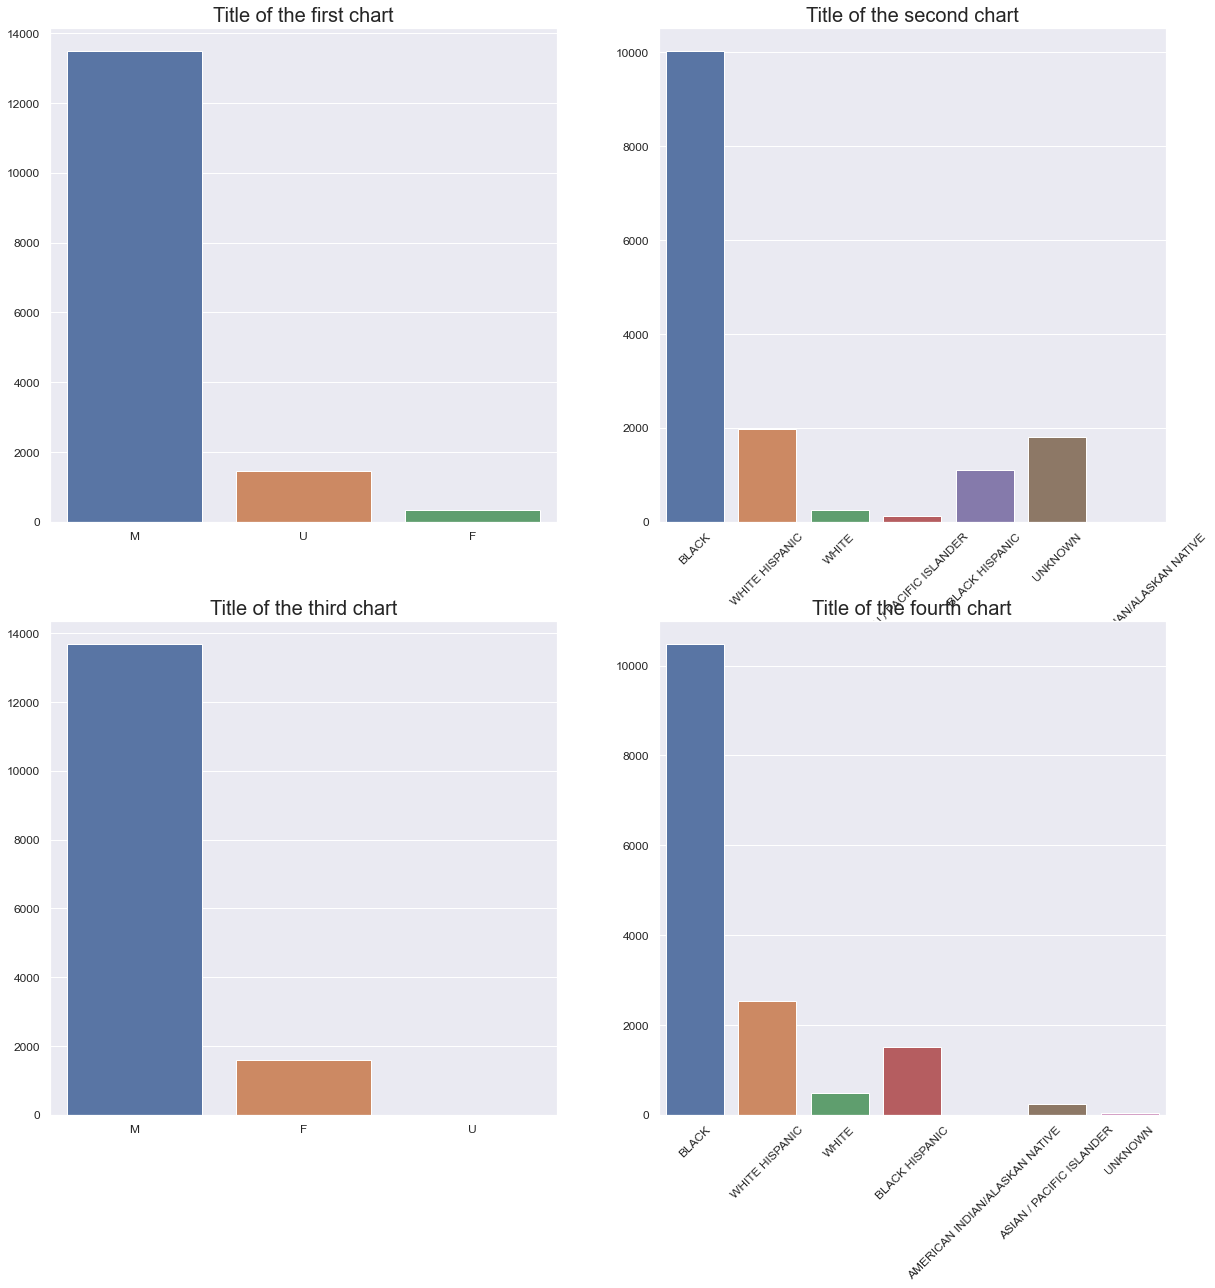

In [20]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
#fig.suptitle('Main Title', y=0.5)

sns.countplot(x="PERP_SEX", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(x="PERP_RACE", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.countplot(x="VIC_SEX", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.countplot(x="VIC_RACE", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.show()

## Time-Series Analysis

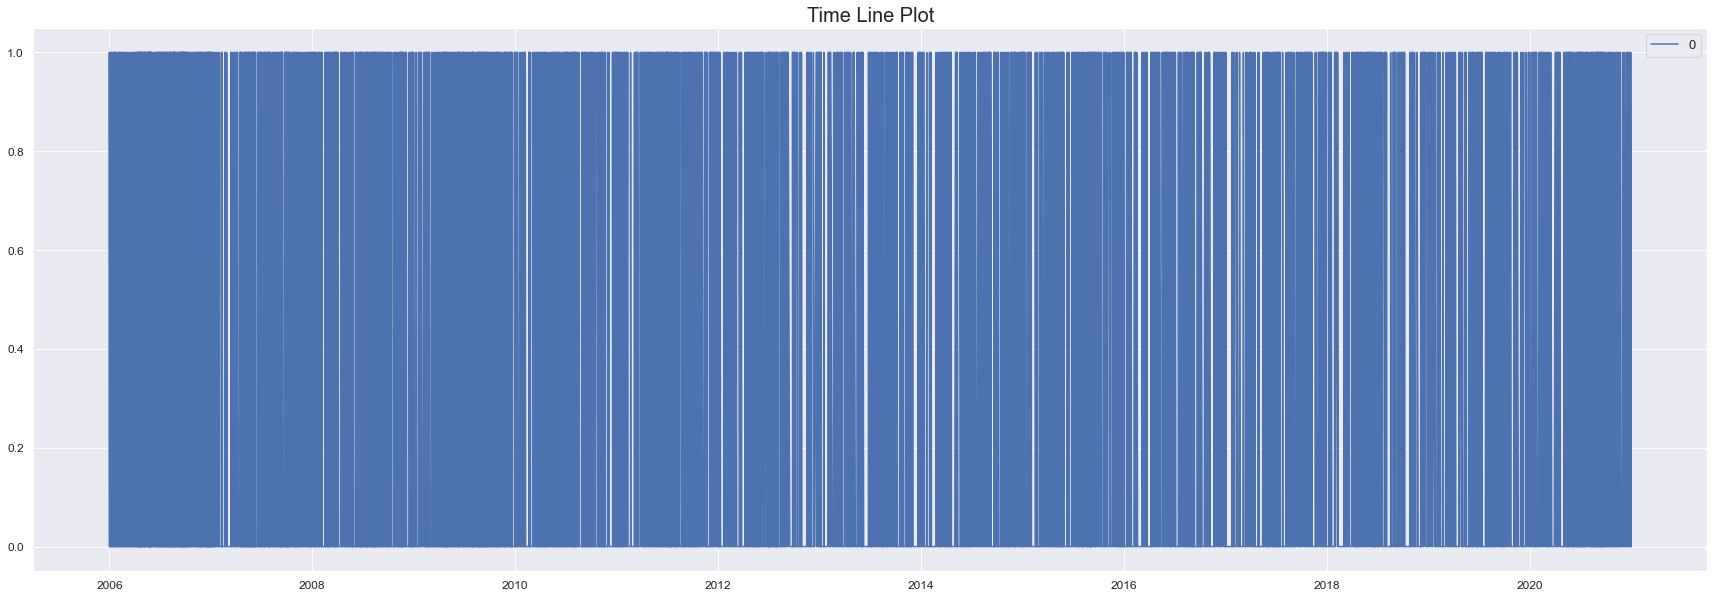

In [21]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.OCCUR_DATE,y=df.STATISTICAL_MURDER_FLAG,data=df, estimator=None)
plt.title("Time Line Plot", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['0','1'])
plt.show()

## Correlation

In [22]:
df.corr(method='spearman')

,PRECINCT,STATISTICAL_MURDER_FLAG
PRECINCT,1.00,-0.00
STATISTICAL_MURDER_FLAG,-0.00,1.00


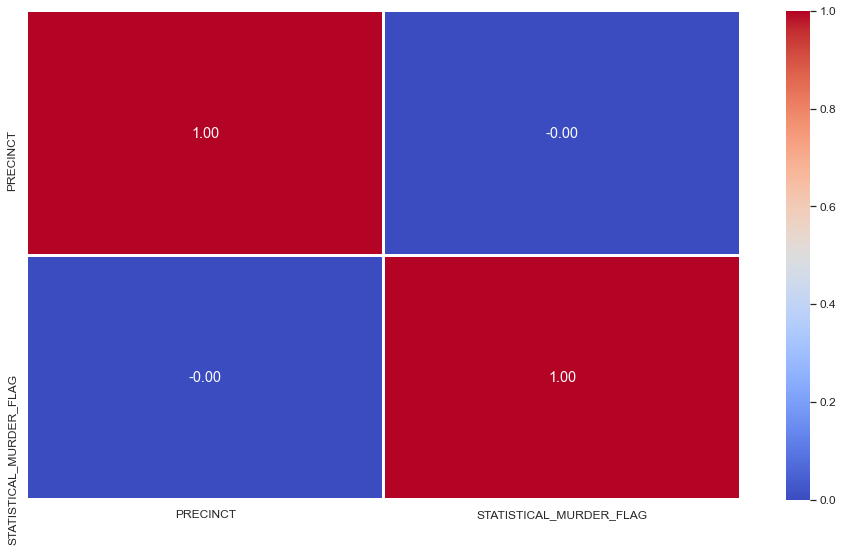

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()